<a href="https://colab.research.google.com/github/SUDHANSHU4497/practice/blob/main/bike_sharing_demand_prediction_sudhanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [55]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/dataset/SeoulBikeData.csv',encoding ='unicode_escape')

In [57]:
bike_df=df.copy()

In [58]:
# Previewing total number of row and columns in data set
bike_df.shape
print(f'our dataset have {bike_df.shape[0]} rows and {bike_df.shape[1]} features')

our dataset have 8760 rows and 14 features


In [59]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [60]:
columns=list(bike_df.columns)

In [61]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* Our dataset have 14 columns

* All the columns have 8760 non null data means no missing value

* Data columns have wrong data type






In [62]:
# previewing duplicate items
bike_df_duplicate_rows=bike_df[bike_df.duplicated()]
print("no of duplicate rows :", bike_df_duplicate_rows.shape[0])


no of duplicate rows : 0


* Data set have no duplicate rows

In [63]:
# sorting null items
bike_df.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* As aspected, Dataset have no null data

In [64]:
# correcting date datatype
# bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')
bike_df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [65]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

* date datatype is changed.
* memory uses also reduces

In [66]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [67]:
bike_df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [68]:
bike_df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [69]:
bike_df['Date'].unique()

array(['2017-12-01T00:00:00.000000000', '2017-12-02T00:00:00.000000000',
       '2017-12-03T00:00:00.000000000', '2017-12-04T00:00:00.000000000',
       '2017-12-05T00:00:00.000000000', '2017-12-06T00:00:00.000000000',
       '2017-12-07T00:00:00.000000000', '2017-12-08T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-10T00:00:00.000000000',
       '2017-12-11T00:00:00.000000000', '2017-12-12T00:00:00.000000000',
       '2017-12-13T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2017-12-15T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
       '2017-12-19T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
       '2017-12-21T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2017-12-28

In [70]:
# previewing statistical distribution of all columns in data set
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


* hour columns is normally distributed
* rest of the columns have certain percentage of skew.

In [71]:

bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month_name()
bike_df['Day']=bike_df['Date'].dt.day_name()



In [72]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [73]:
bike_df['Year']=bike_df['Year'].astype('object')



In [74]:
pd.set_option("display.max_columns", None)
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday


In [75]:
# categorizing numerical and categorical columns
numeric_cols = bike_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = bike_df.select_dtypes(['object','category']).columns.tolist()

In [76]:
plt.rcdefaults()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

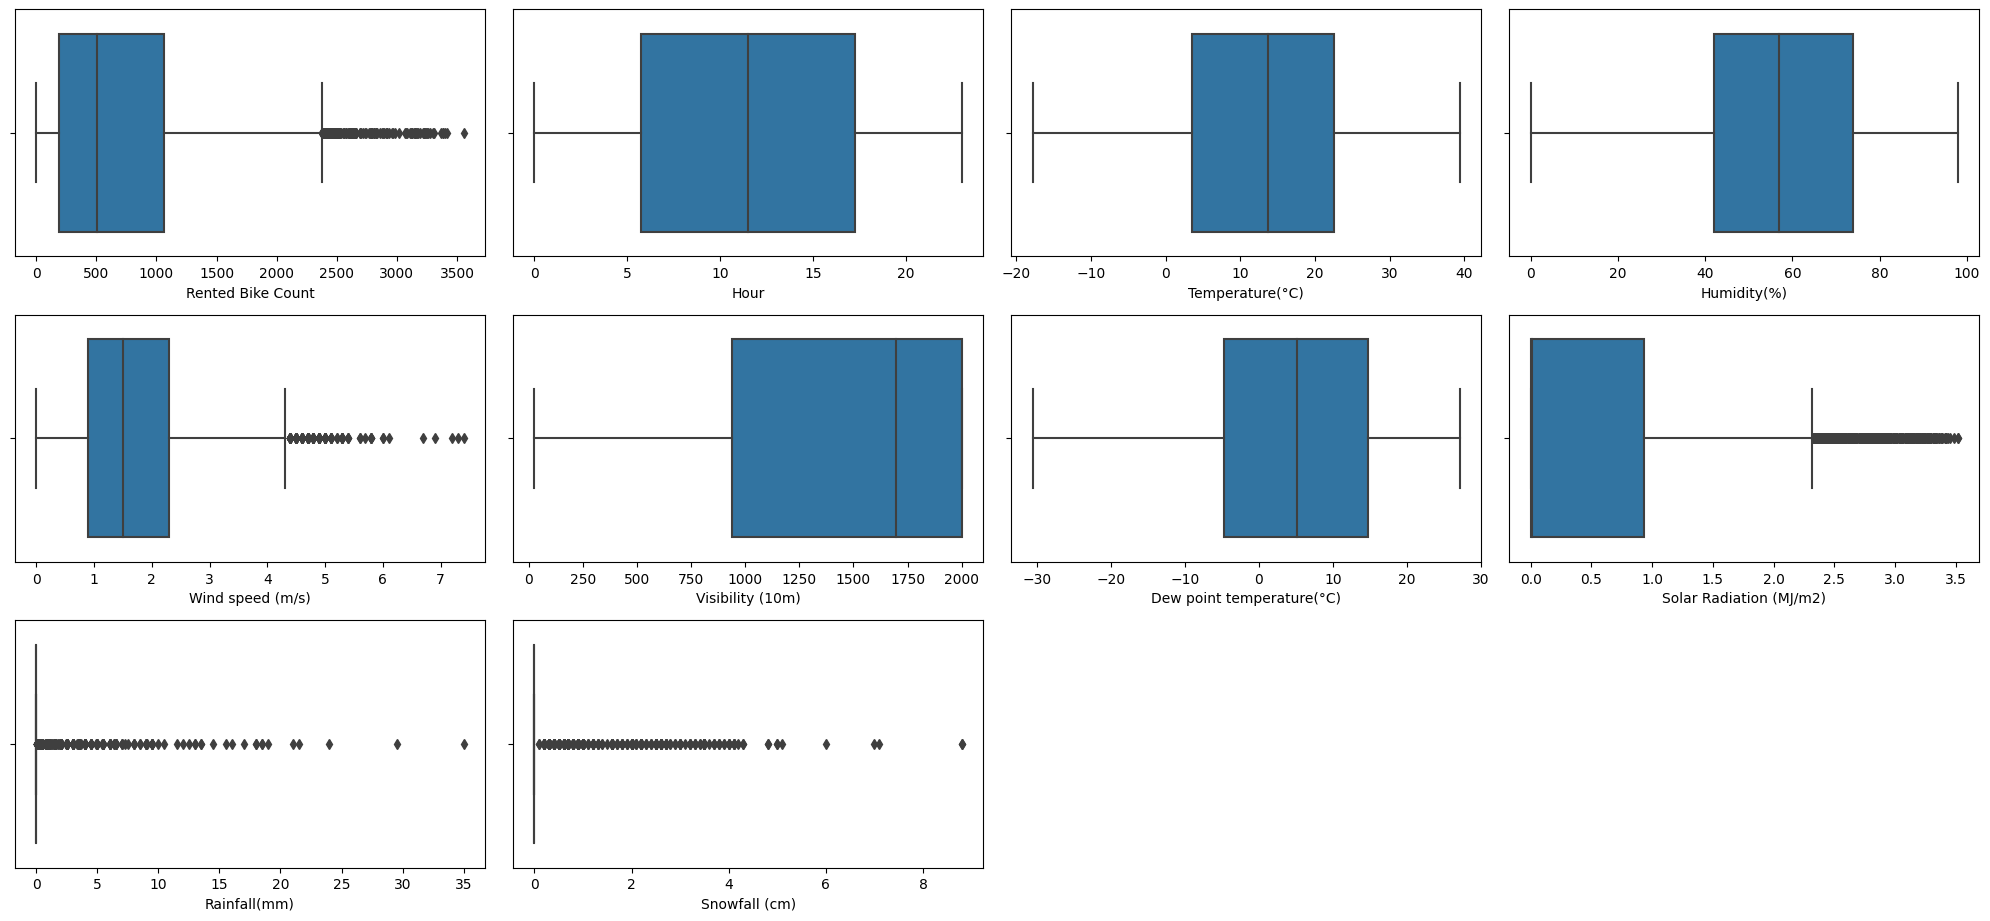

In [77]:
# outlier detection
# plotting boxplot for numerical columns
n = 1
plt.figure(figsize=(20,15))
for column in numeric_cols:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(bike_df[column])
    plt.tight_layout()
plt.show()

In [78]:
# for col in bike_df:
#     print(bike_df[col].unique())
for col in bike_df:
    print(f'{col}:\n {bike_df[col].unique()}\n')

Date:
 ['2017-12-01T00:00:00.000000000' '2017-12-02T00:00:00.000000000'
 '2017-12-03T00:00:00.000000000' '2017-12-04T00:00:00.000000000'
 '2017-12-05T00:00:00.000000000' '2017-12-06T00:00:00.000000000'
 '2017-12-07T00:00:00.000000000' '2017-12-08T00:00:00.000000000'
 '2017-12-09T00:00:00.000000000' '2017-12-10T00:00:00.000000000'
 '2017-12-11T00:00:00.000000000' '2017-12-12T00:00:00.000000000'
 '2017-12-13T00:00:00.000000000' '2017-12-14T00:00:00.000000000'
 '2017-12-15T00:00:00.000000000' '2017-12-16T00:00:00.000000000'
 '2017-12-17T00:00:00.000000000' '2017-12-18T00:00:00.000000000'
 '2017-12-19T00:00:00.000000000' '2017-12-20T00:00:00.000000000'
 '2017-12-21T00:00:00.000000000' '2017-12-22T00:00:00.000000000'
 '2017-12-23T00:00:00.000000000' '2017-12-24T00:00:00.000000000'
 '2017-12-25T00:00:00.000000000' '2017-12-26T00:00:00.000000000'
 '2017-12-27T00:00:00.000000000' '2017-12-28T00:00:00.000000000'
 '2017-12-29T00:00:00.000000000' '2017-12-30T00:00:00.000000000'
 '2017-12-31T00:00

In [79]:
bike_df['type of day']=bike_df['Day'].apply(lambda x: "weekend" if x=='Saturday' or x=='Sunday' else "weekday")

In [80]:
type_of_day_df=bike_df.groupby('type of day').sum()
type_of_day_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
type of day,,,,,,,,,,
weekday,4506628,72036,80357.9,366094,10895.9,9064643,25879.3,3520.34,994.5,481.9
weekend,1665686,28704,32496.5,143968,4214.3,3521951,9807.3,1465.07,308.0,175.7


Text(0.5, 1.0, 'type of day')

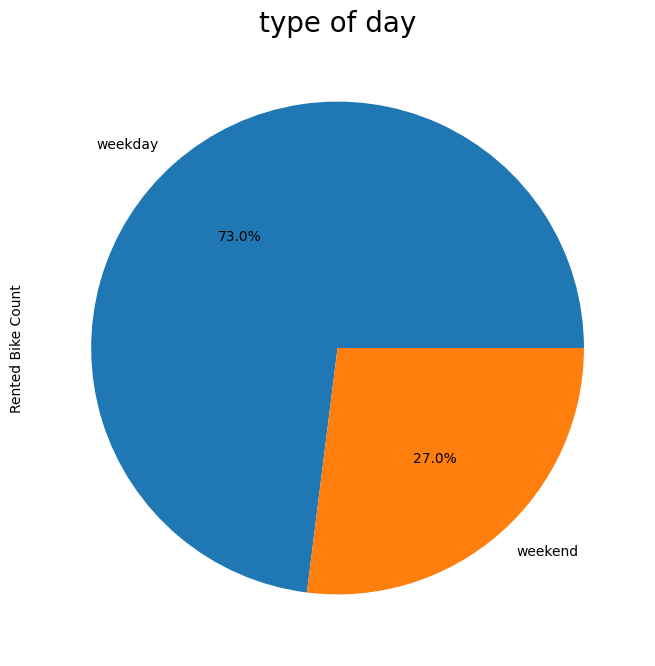

In [81]:
type_of_day_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')
plt.title('type of day',fontsize=20)

In [82]:
# Change holiday/no holiday to yes/no
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}
bike_df = bike_df.replace(label)
bike_df.head

<bound method NDFrame.head of            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0         

In [83]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [84]:
# Days between which the data is collected
print('Start date: ',bike_df['Date'].min())
print('End date: ',bike_df['Date'].max())
		
# Number of days for which the data is collected
print('Number of days the data is collected: ',bike_df['Date'].max()-bike_df['Date'].min())

Start date:  2017-12-01 00:00:00
End date:  2018-11-30 00:00:00
Number of days the data is collected:  364 days 00:00:00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


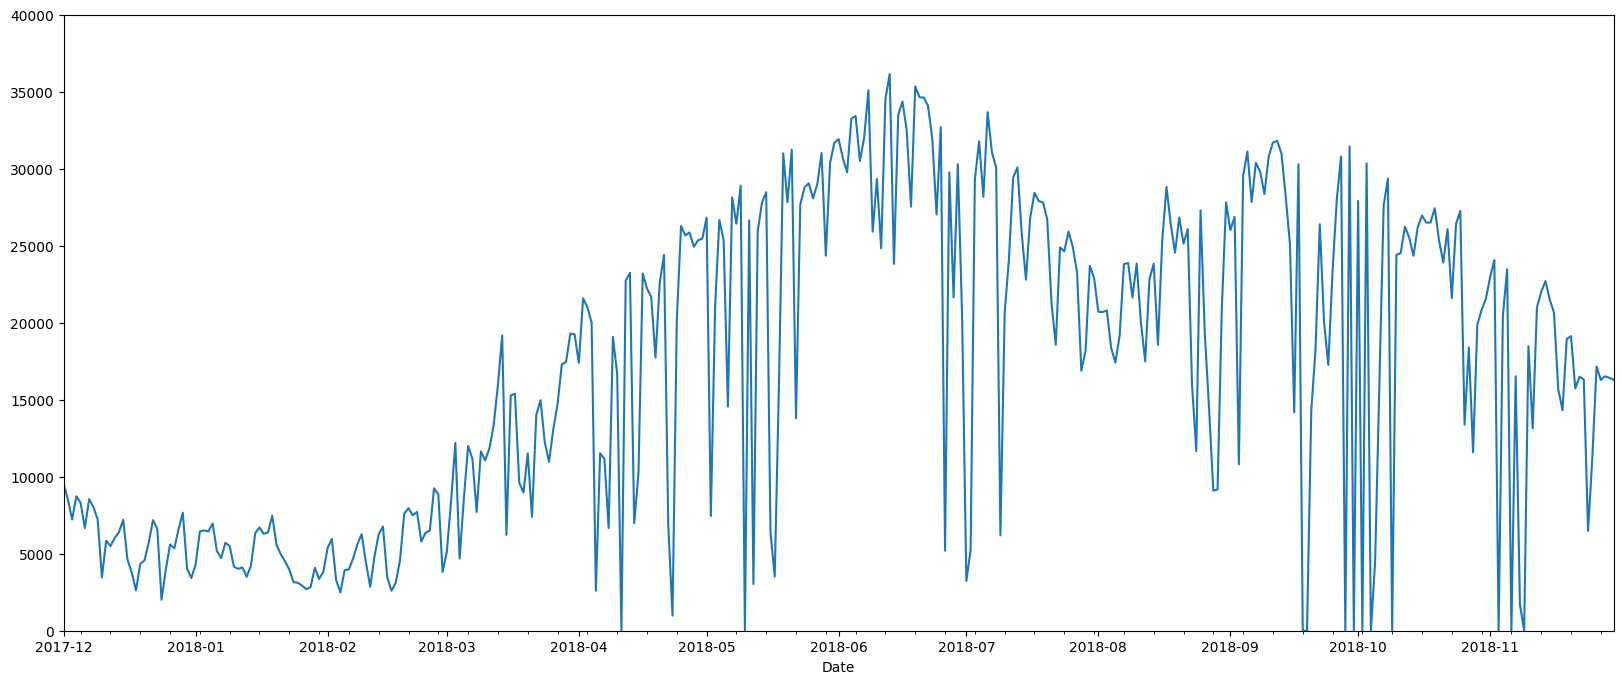

In [85]:
import matplotlib.dates as md

#in first examples we play with groupby
by_day = bike_df.groupby(['Date'])['Rented Bike Count'].sum()
fig, ax1 = plt.subplots(1,1, figsize=(20,8))
sns.lineplot(by_day.index, by_day.values, ax=ax1)

# fig.autofmt_xdate()
ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
ax1.set_xlim(md.datestr2num(("2017/12/01", "2018/11/30")))
ax1.set_ylim((0, 40000))
ax1.xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 1))
ax1.grid(b=True, which='minor', color='white', lw=0.5)

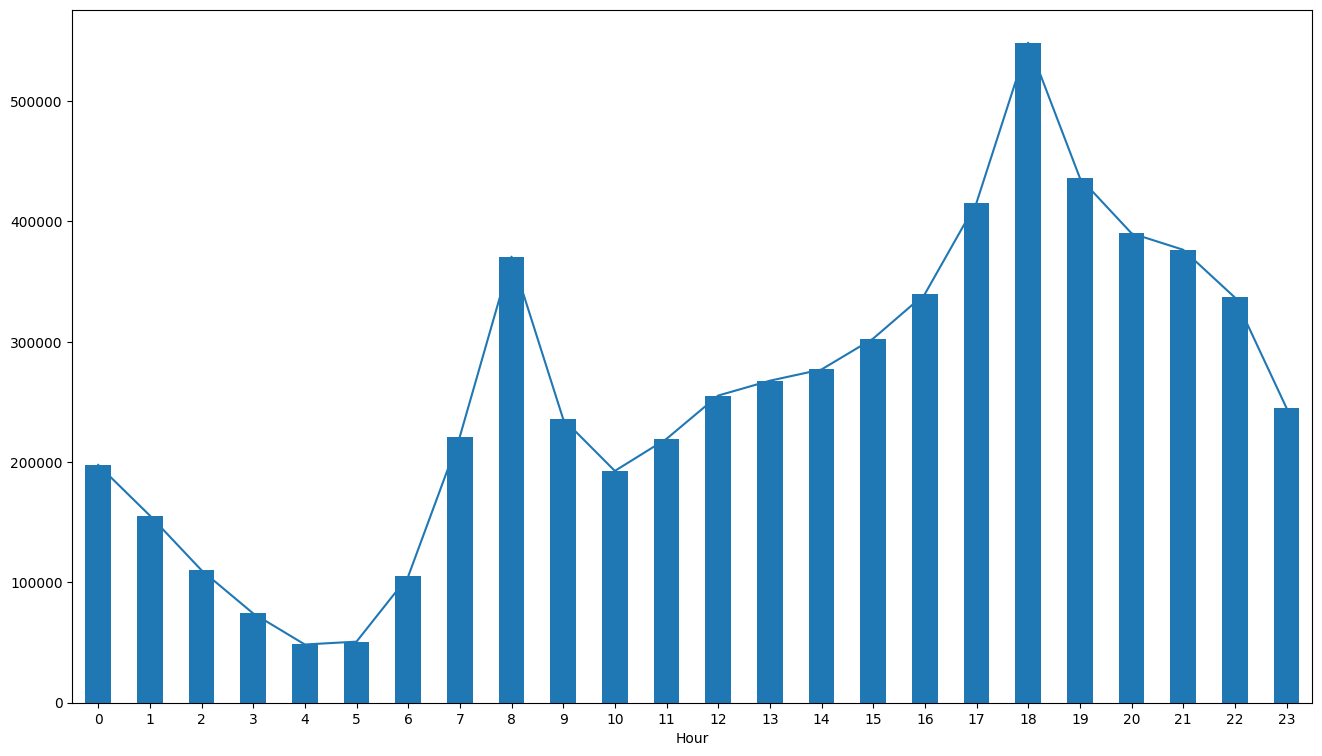

In [86]:
plt.figure(figsize=(16,9))
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


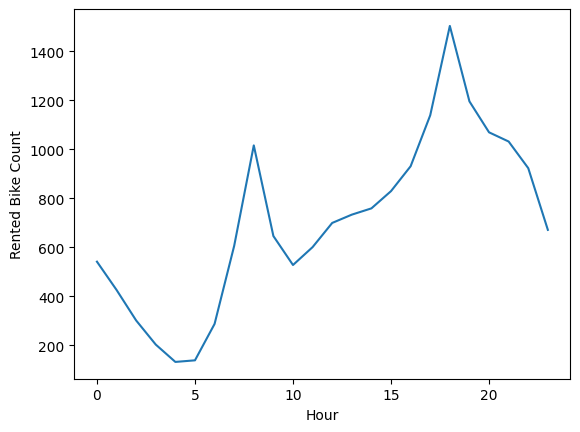

In [87]:
sns.lineplot('Hour','Rented Bike Count',data=bike_df,ci=None )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


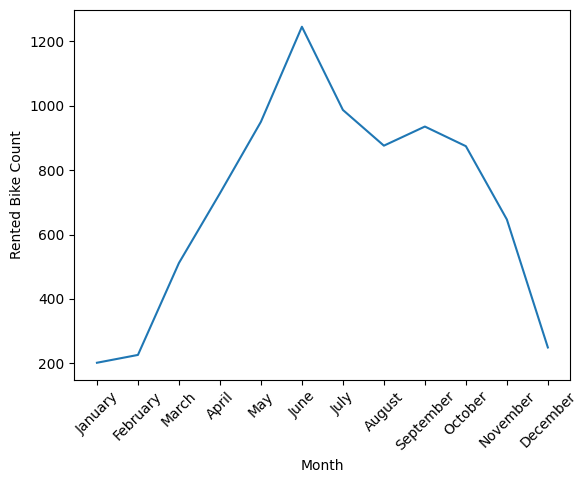

In [88]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
bike_df['Month'] = pd.Categorical(bike_df['Month'],categories=reindex,ordered=True)

sns.lineplot('Month','Rented Bike Count',data=bike_df,ci=None )
plt.xticks(rotation=45)

plt.show()

* june month have maximum number of bike count
* january have least number of booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


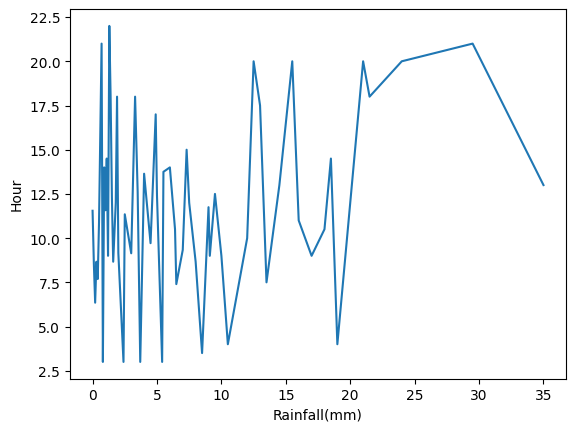

In [89]:
sns.lineplot('Rainfall(mm)','Hour',data=bike_df,ci=None )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


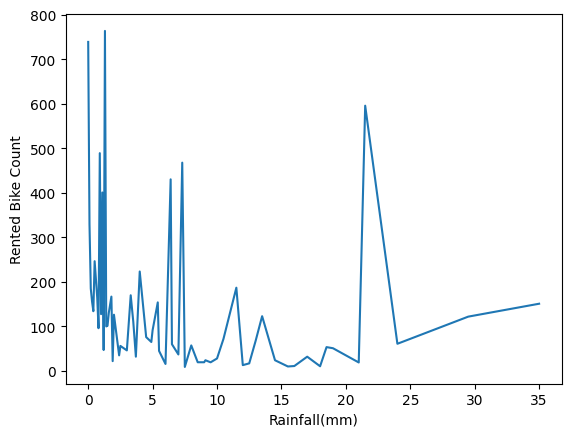

In [90]:
sns.lineplot('Rainfall(mm)','Rented Bike Count',data=bike_df,ci=None )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

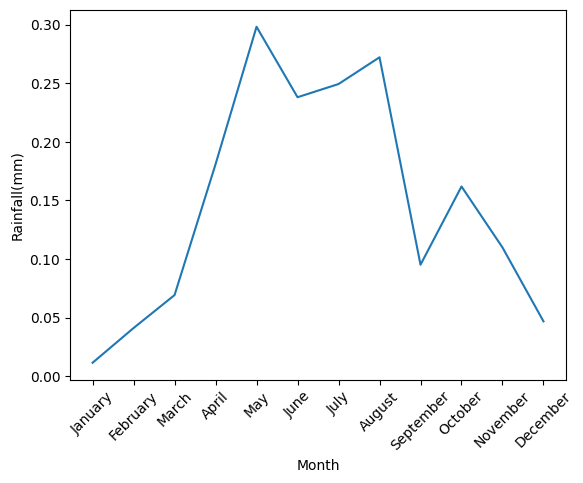

In [91]:
sns.lineplot('Month','Rainfall(mm)',data=bike_df,ci=None )
# sns.lineplot('Month','Rented Bike Count',data=bike_df,ci=None )
plt.xticks(rotation=45)

In [92]:
day_df=bike_df.groupby('Day').sum()
day_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Day,,,,,,,,,,
Friday,950334,14628,15876.0,72508,2168.6,1818110,4275.3,748.65,135.2,62.7
Monday,911743,14352,16285.7,72633,2121.6,1757494,5435.9,696.74,218.5,73.3
Saturday,885492,14352,16270.5,70956,2222.6,1774451,4636.7,788.60,138.7,87.5
Sunday,780194,14352,16226.0,73012,1991.7,1747500,5170.6,676.47,169.3,88.2
Thursday,861999,14352,15731.9,75724,2193.9,1768131,5509.2,667.21,249.5,85.2
Tuesday,858596,14352,16168.4,71646,2159.7,1860462,5146.4,682.78,221.0,109.1
Wednesday,923956,14352,16295.9,73583,2252.1,1860446,5512.5,724.96,170.3,151.6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b7ee1d990>],
      dtype=object)

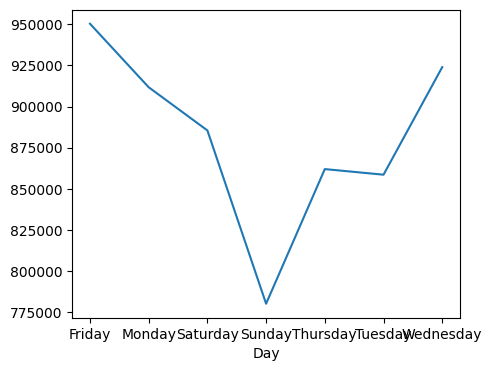

In [93]:
day_df['Rented Bike Count'].plot(kind='line', subplots=True, figsize=(5, 4))#,autopct='%1.1f%%')

In [94]:
bike_df.Day.agg(["value_counts"])

,value_counts
Friday,1272
Saturday,1248
Sunday,1248
Monday,1248
Tuesday,1248
Wednesday,1248
Thursday,1248


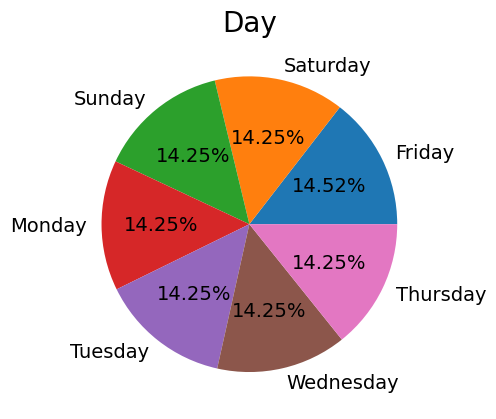

In [95]:
labels = bike_df['Day'].value_counts().index.tolist()
sizes = bike_df['Day'].value_counts().tolist()
# explode = (0, 0.3)  # exploding 10 % of radius
# colors = sns.color_palette(['pink','green'])[0:5]
plt.pie(sizes, labels=labels, autopct='%1.2f%%',startangle=0, textprops={'fontsize': 14})

# setting up title
plt.title('Day',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

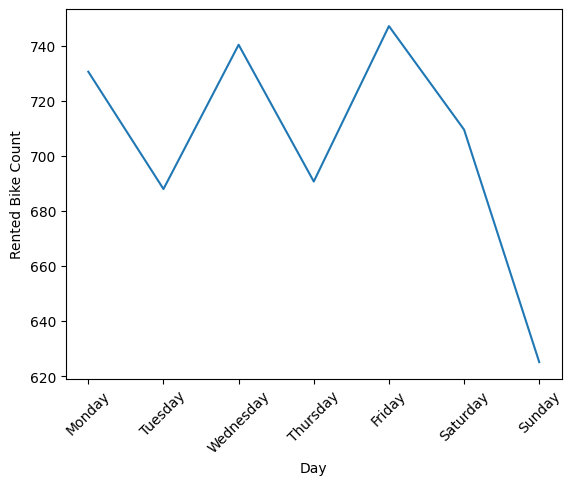

In [96]:
reindex = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
bike_df['Day'] = pd.Categorical(bike_df['Day'],categories=reindex,ordered=True)
sns.lineplot('Day','Rented Bike Count',data=bike_df,ci=None )

plt.xticks(rotation=45)

In [97]:
holiday_df=bike_df.groupby('Holiday').sum()
holiday_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Holiday,,,,,,,,,,
No,5956419,95772,108556.1,486850,14319.8,11929228,35580.4,4747.92,1268.8,635.6
Yes,215895,4968,4298.3,23212,790.4,657366,106.2,237.49,33.7,22.0


Text(0.5, 1.0, 'Day is holiday')

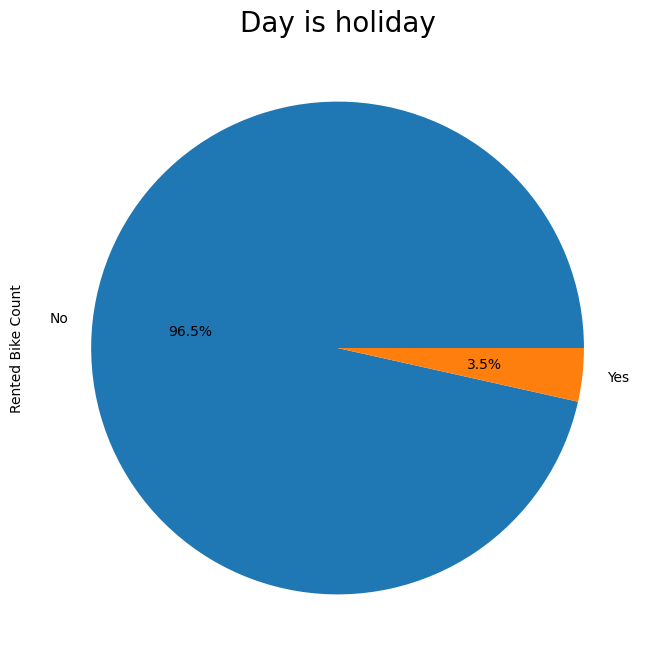

In [98]:
holiday_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')
plt.title('Day is holiday',fontsize=20)

In [99]:
season_df=bike_df.groupby('Seasons').sum()
season_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6


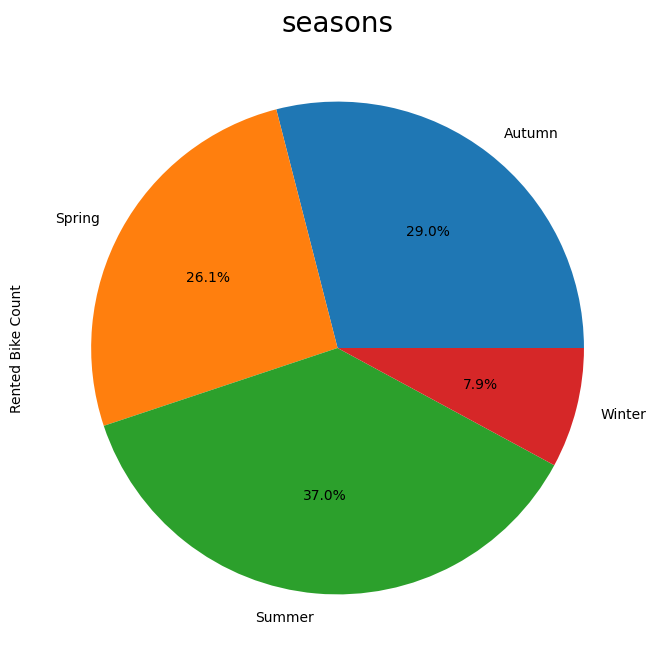

In [100]:
season_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')
# setting up title
plt.title('seasons',fontsize=20)
plt.show()

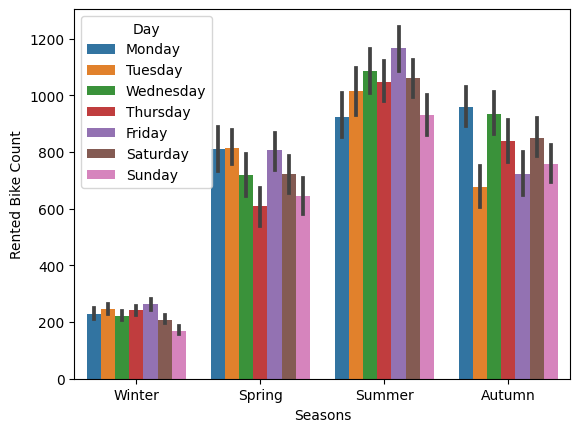

In [101]:
sns.barplot(data=bike_df,x='Seasons',y='Rented Bike Count',hue='Day')

In [104]:
# categorizing numerical and categorical columns
numeric_cols = bike_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = bike_df.select_dtypes(['object','category']).columns.tolist()


In [106]:
numeric_cols

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [105]:
categorical_cols

['Seasons',
 'Holiday',
 'Functioning Day',
 'Year',
 'Month',
 'Day',
 'type of day']

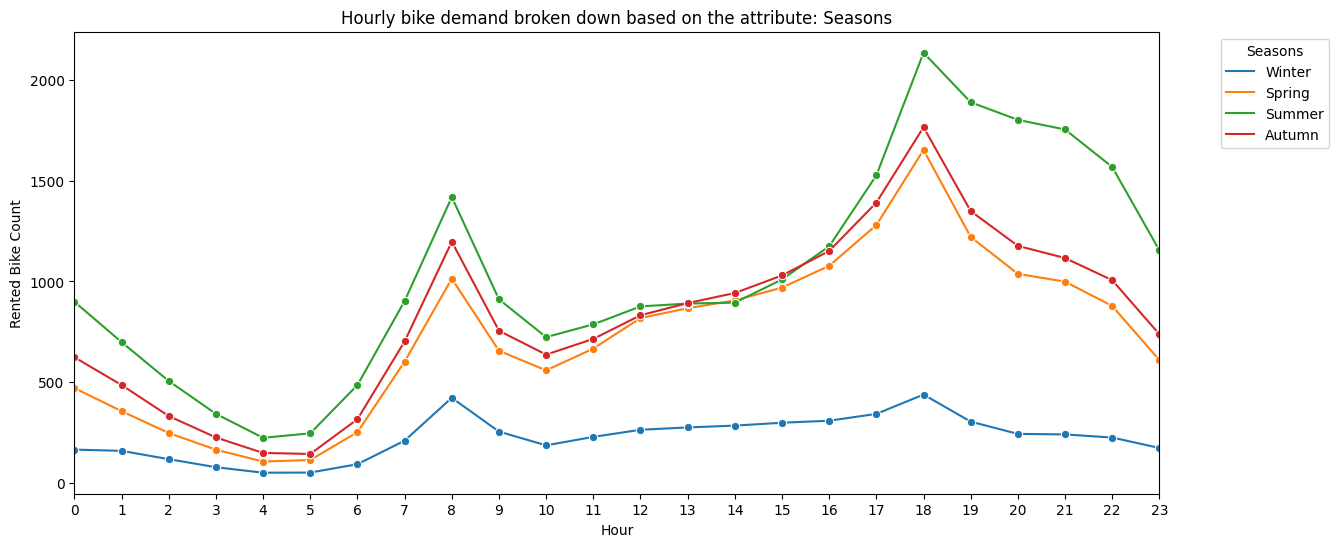

<Figure size 1600x900 with 0 Axes>

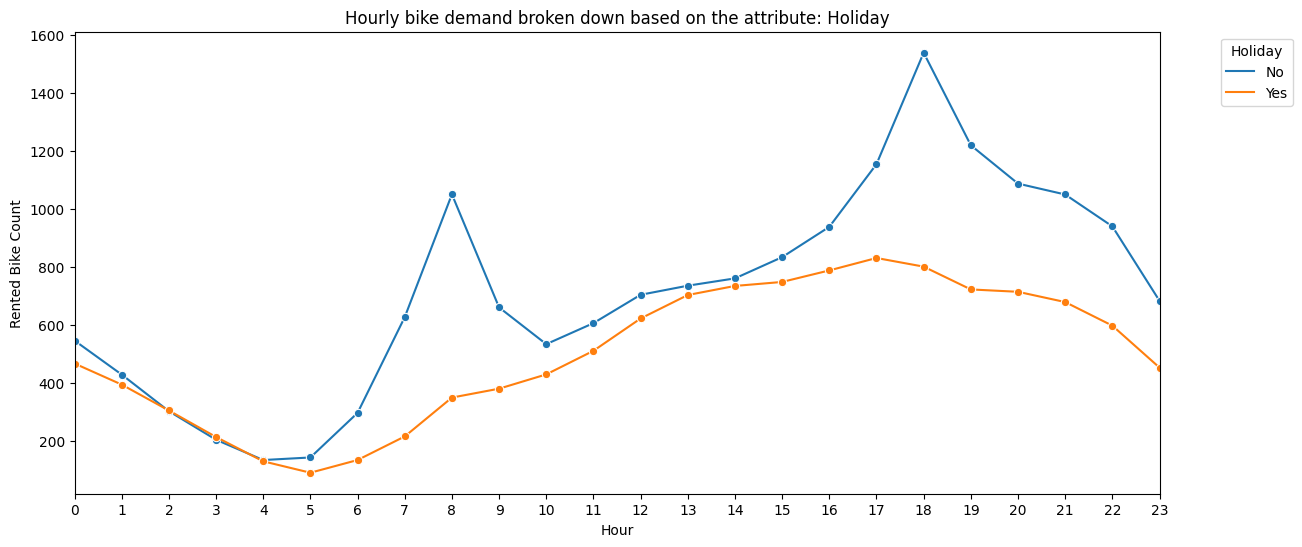

<Figure size 1600x900 with 0 Axes>

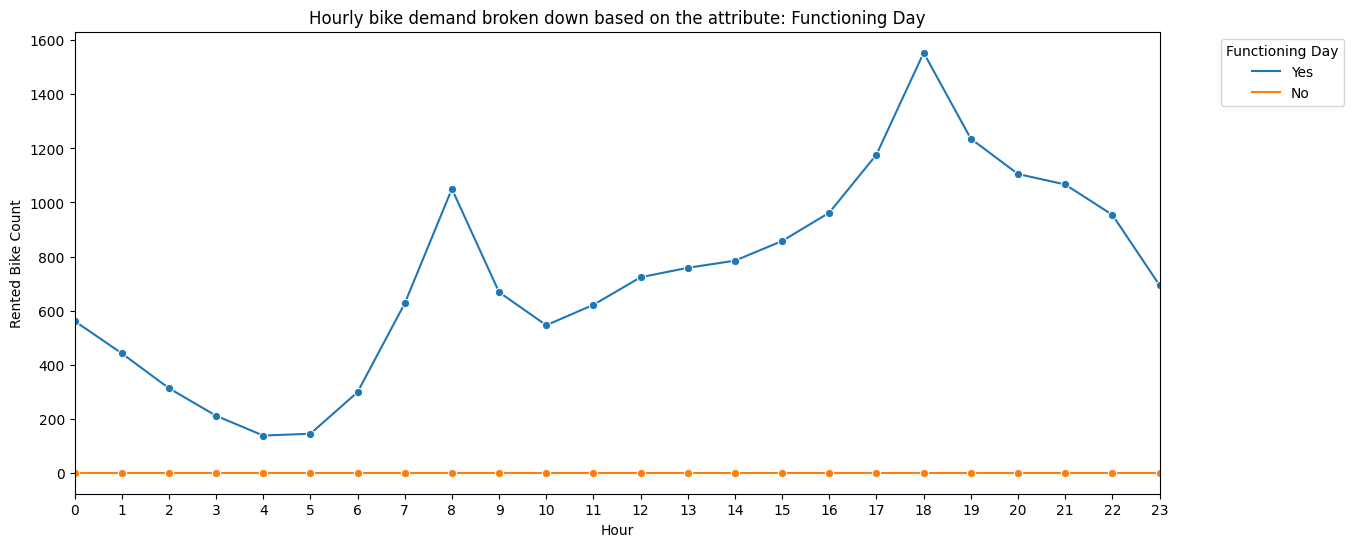

<Figure size 1600x900 with 0 Axes>

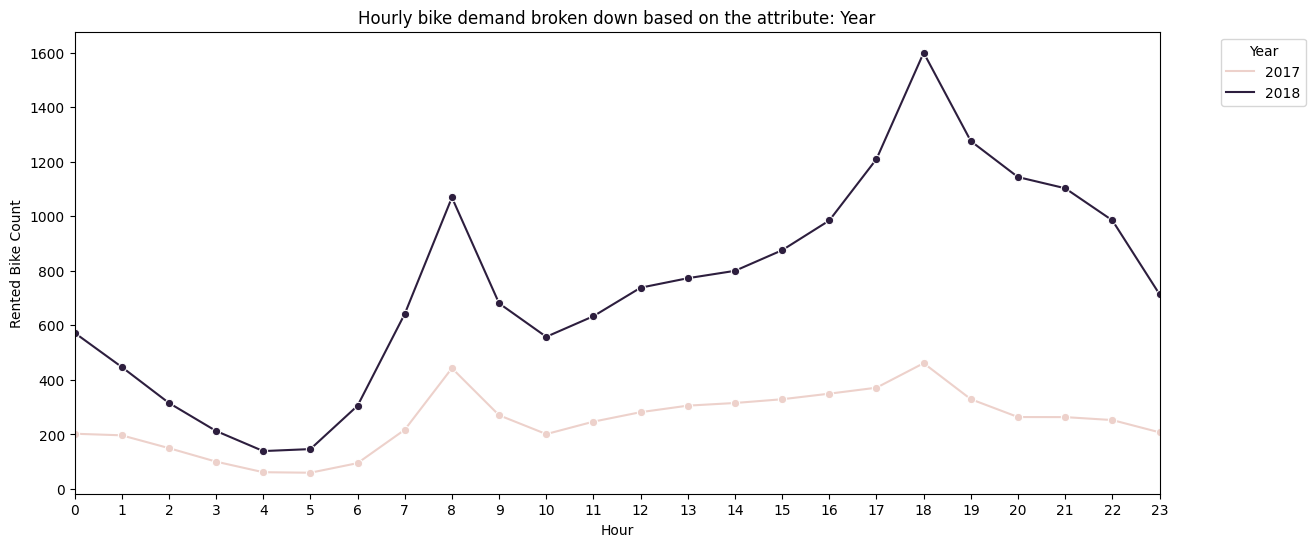

<Figure size 1600x900 with 0 Axes>

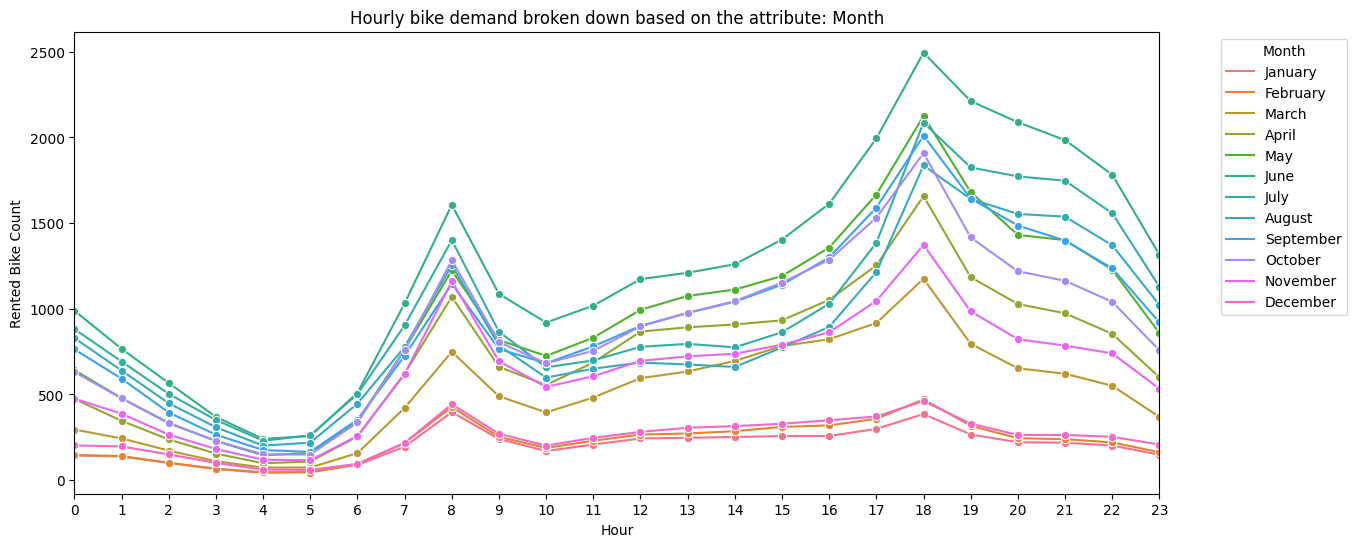

<Figure size 1600x900 with 0 Axes>

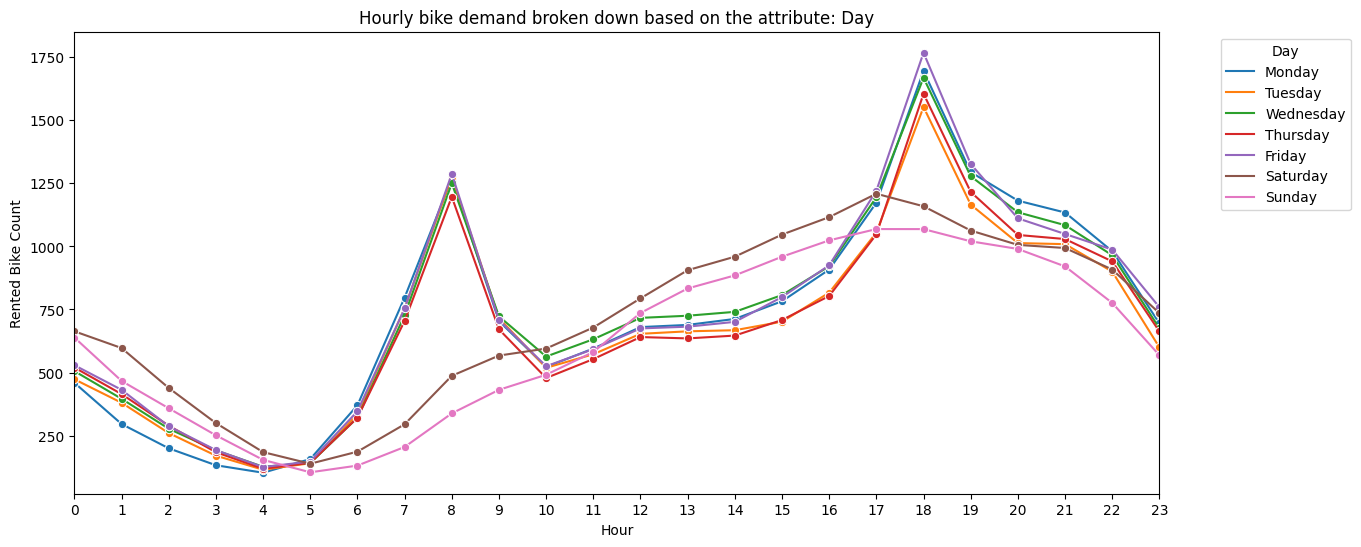

<Figure size 1600x900 with 0 Axes>

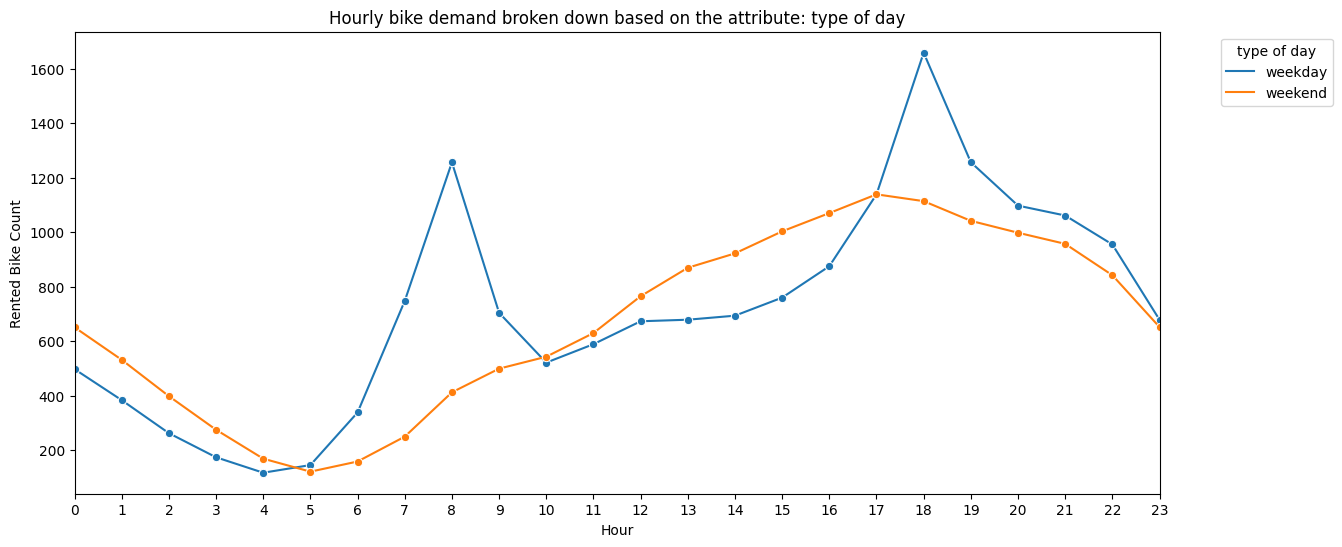

<Figure size 1600x900 with 0 Axes>

In [132]:
for i in categorical_cols:
  if i == numeric_cols[1]:
    continue
  else:
    fig, ax = plt.subplots(figsize=(14,6))
    sns.lineplot(data=bike_df, x=numeric_cols[1], y='Rented Bike Count', hue=i, ax=ax,marker = "o",ci=None)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    ax.set_xlim((0, 23))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.figure(figsize=(16,9))
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

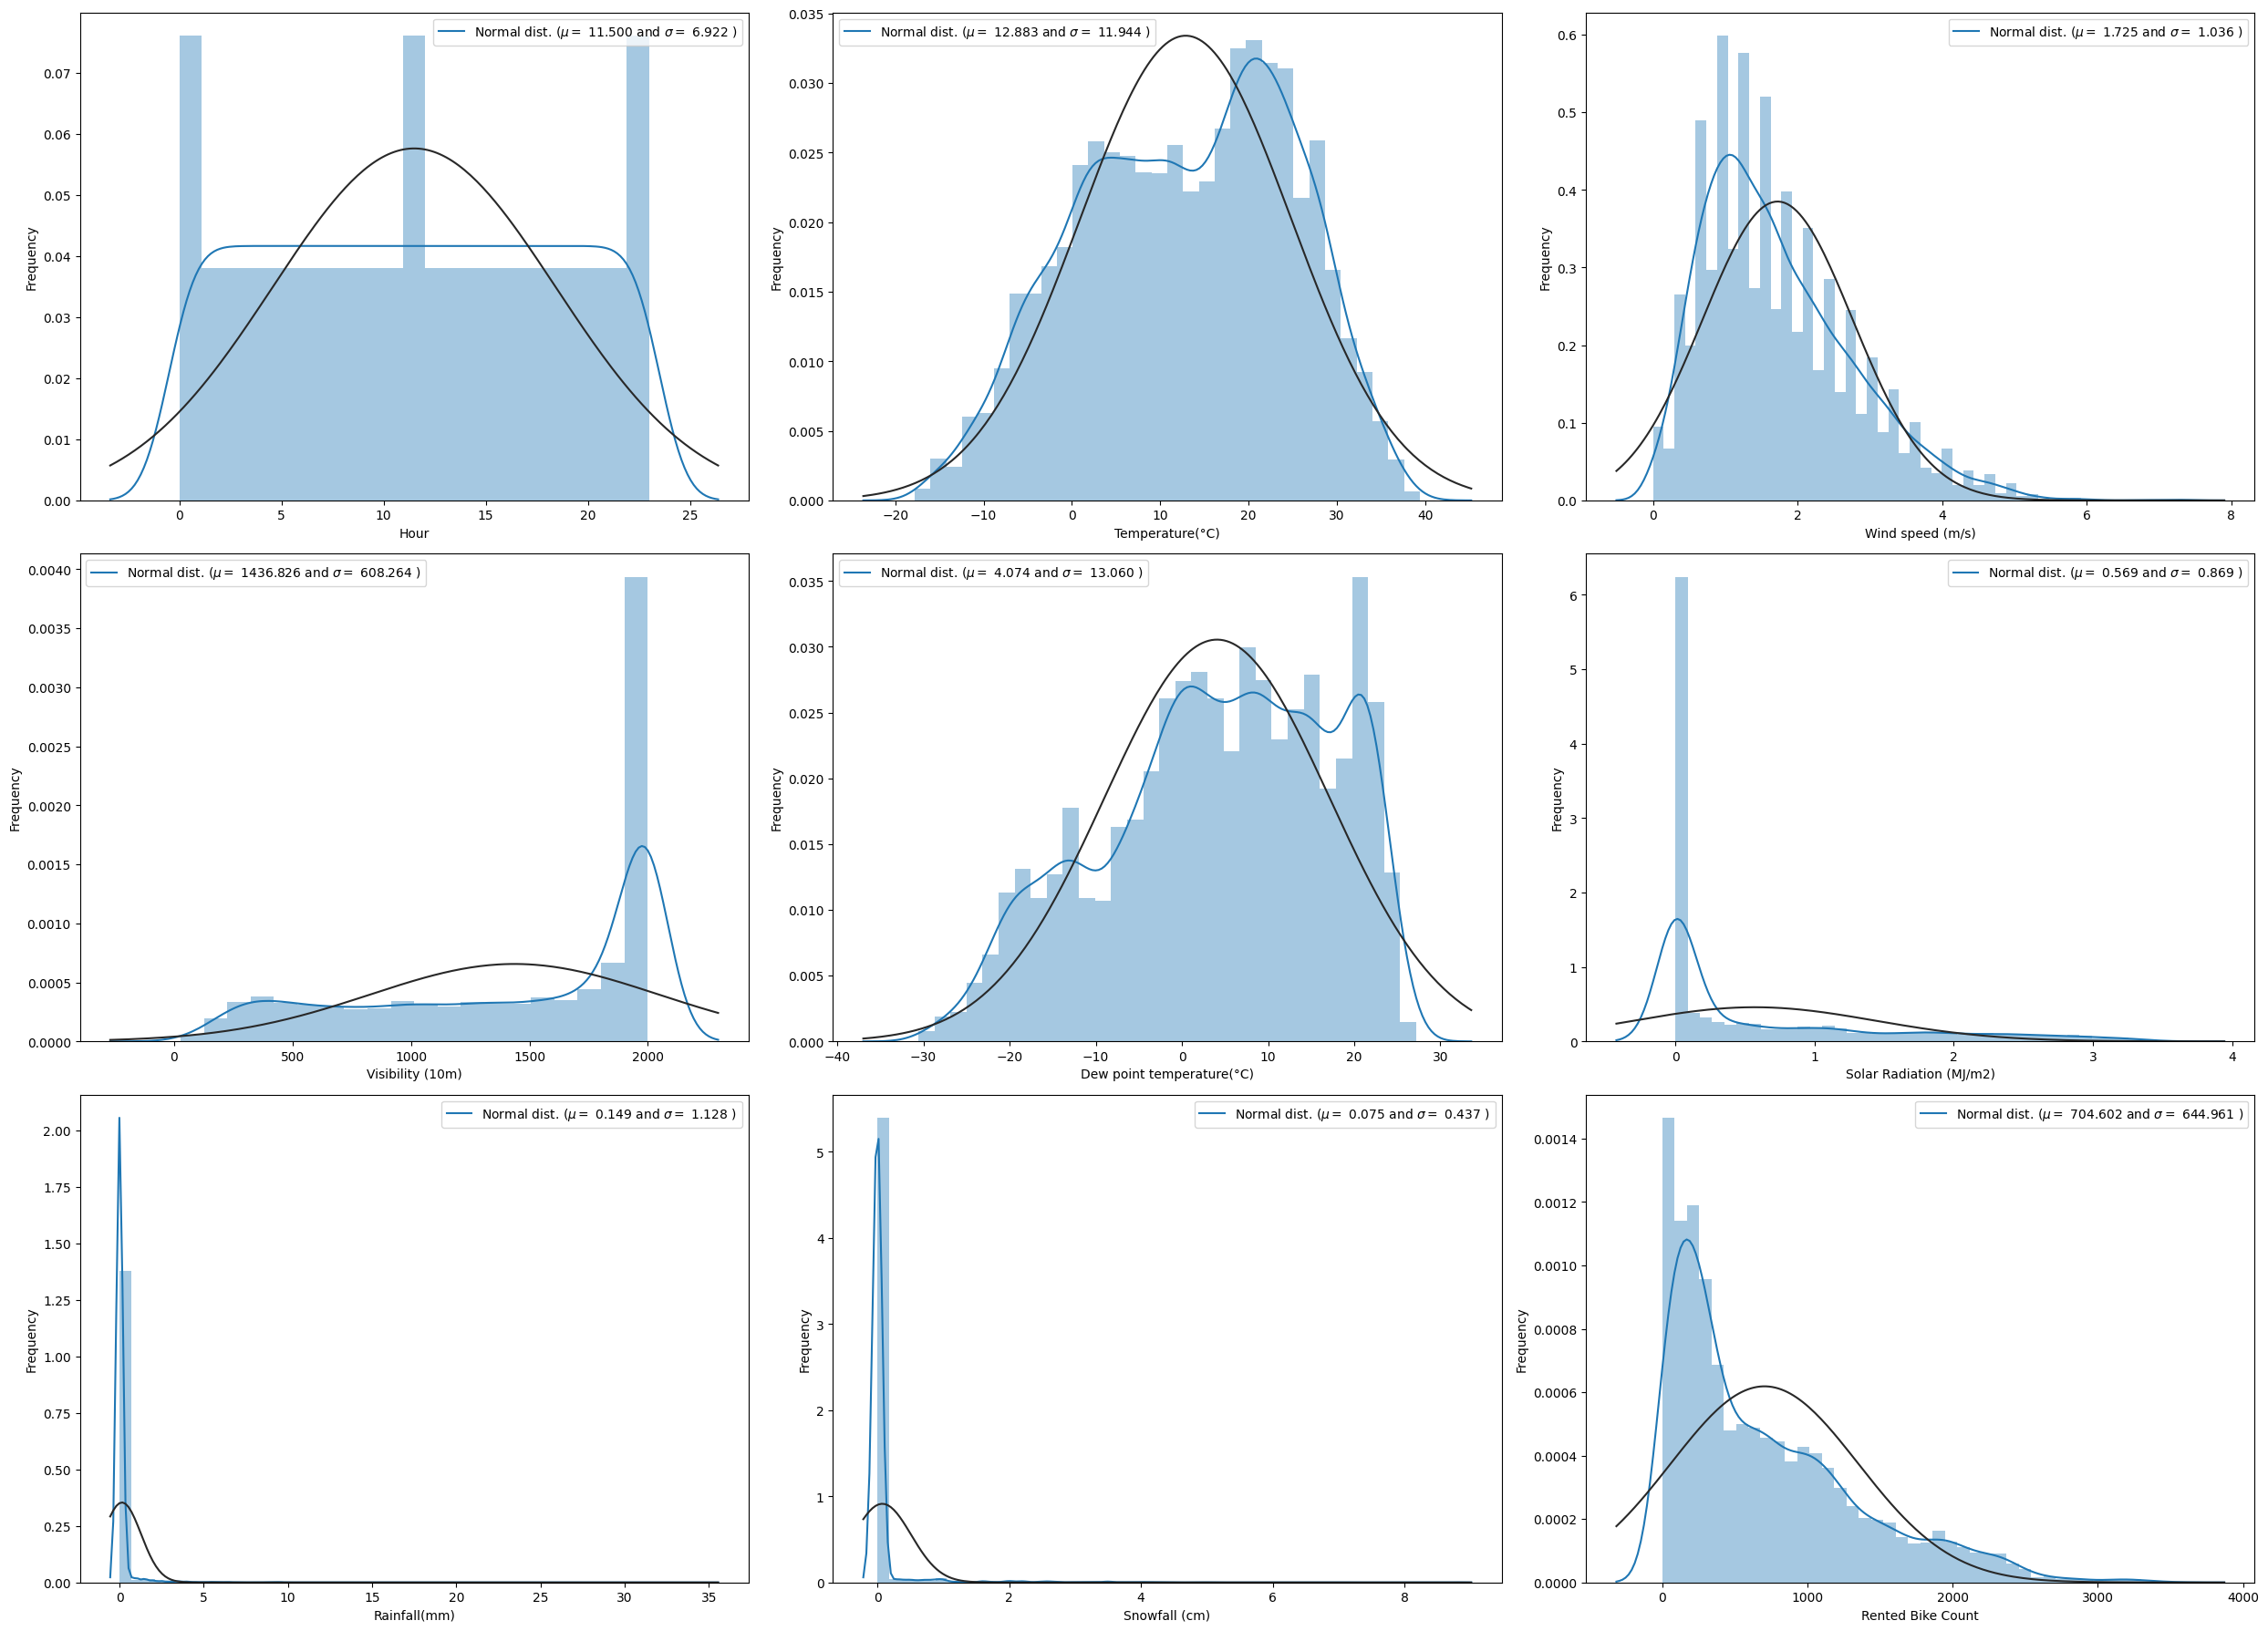

In [102]:
#Univariate data distribution
from scipy.stats import norm, skew, boxcox #for some statistics
def PlotDist(bike_df):
    fig, axs = plt.subplots(3, 3, figsize=(25,18))
    x1, y1 = 0, 0
    for cols in bike_df.columns:
        #print(cl, x1, y1)
        sns.distplot(bike_df[cols], fit=norm, ax=axs[y1][x1])
        (mu, sigma) = norm.fit(bike_df[cols])
        #Now plot the distribution
        axs[y1][x1].legend(['Normal dist. ($\mu=$ {:.3f} and $\sigma=$ {:.3f} )'.format(mu, sigma)],
                    loc='best')
        
        axs[y1][x1].set_ylabel('Frequency')
        x1 += 1
        if x1 == 3: x1 = 0; y1 +=1
    
    fig.tight_layout()

    
df_p = bike_df[['Hour', 'Temperature(°C)', 
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']]

PlotDist(df_p)
plt.show()

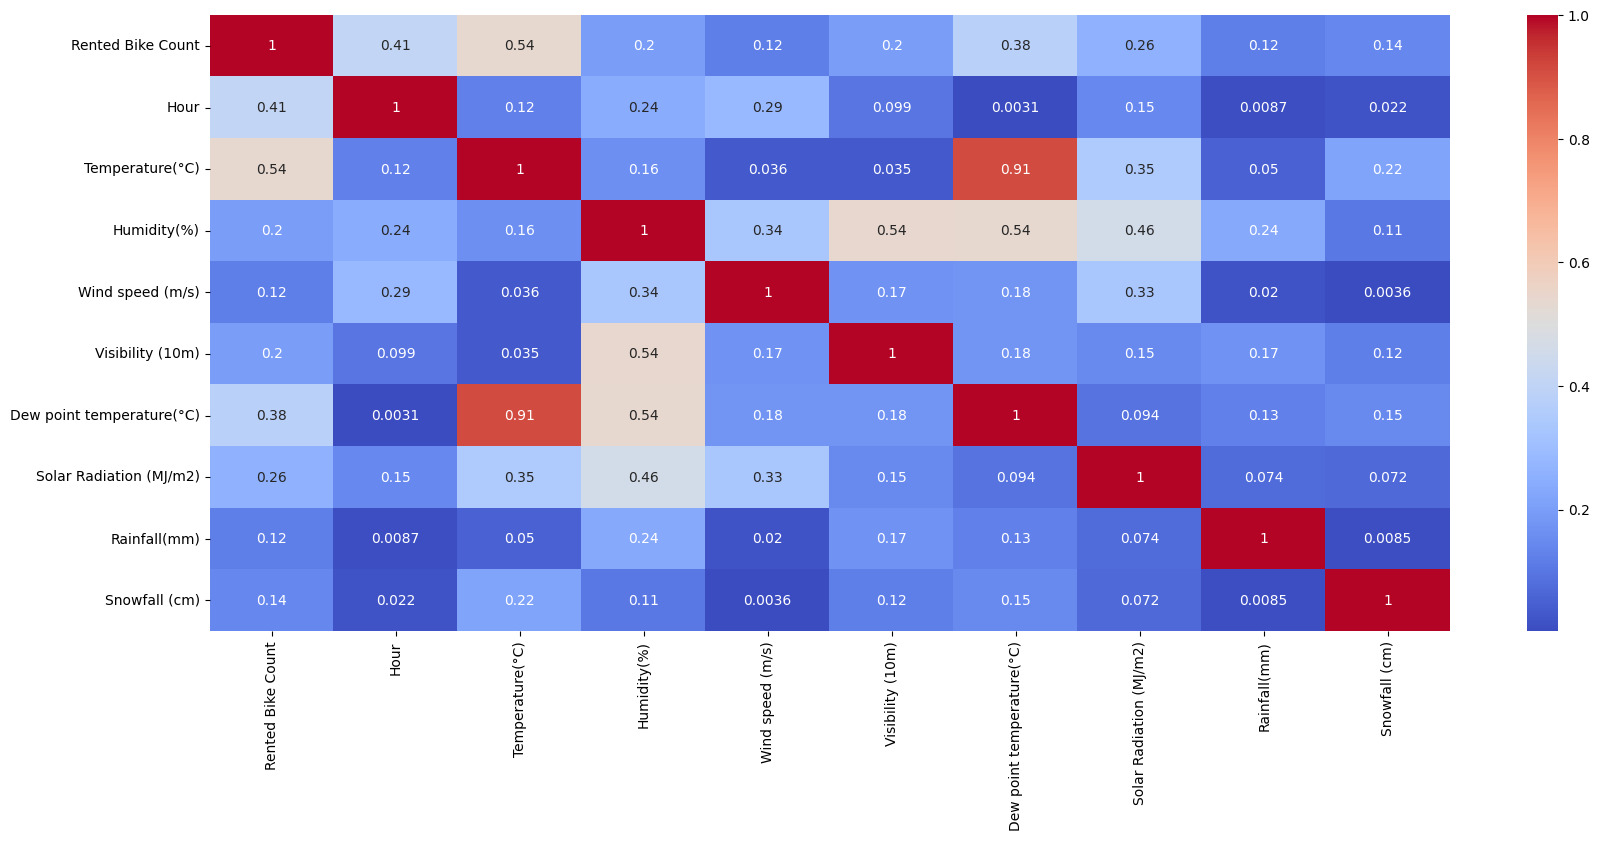

In [103]:
plt.figure(figsize=(20,8))
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')